In [13]:
import pandas as pd
import numpy as np
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=yfinance.download(tickers="ADANIPOWER.BO",start="2001-01-01",end="2020-01-01",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-08-20,105.000000,107.900002,98.500000,100.050003,100.050003,96423800
2009-08-21,99.400002,103.900002,98.500000,103.199997,103.199997,19475100
2009-08-24,104.599998,104.599998,101.650002,103.050003,103.050003,7606000
2009-08-25,101.099998,103.099998,101.000000,102.599998,102.599998,4877400
2009-08-26,102.599998,107.150002,102.599998,105.099998,105.099998,10904200
...,...,...,...,...,...,...
2019-12-24,61.250000,61.549999,60.599998,60.750000,60.750000,255337
2019-12-26,61.299999,61.299999,59.900002,60.049999,60.049999,248303
2019-12-27,60.200001,60.750000,60.000000,60.250000,60.250000,159088


In [16]:
data=data[['Close']]

In [17]:
data

,Close
Date,
2009-08-20,100.050003
2009-08-21,103.199997
2009-08-24,103.050003
2009-08-25,102.599998
2009-08-26,105.099998
...,...
2019-12-24,60.750000
2019-12-26,60.049999
2019-12-27,60.250000


<AxesSubplot:xlabel='Date'>

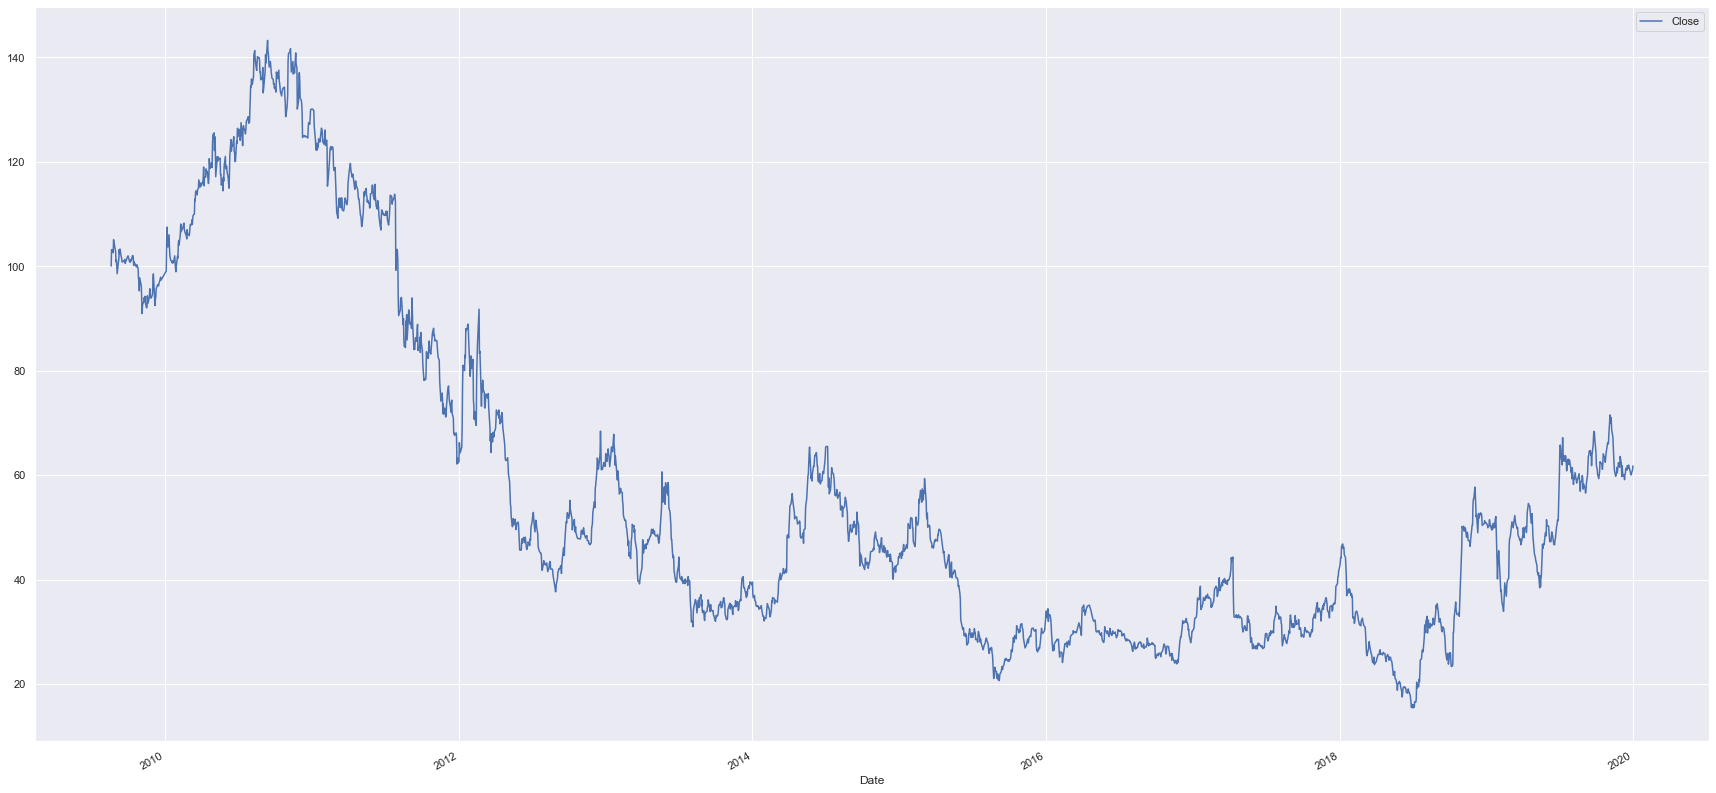

In [18]:
data.plot(figsize=(30,15))

In [19]:
from statsmodels.tsa.api import seasonal_decompose

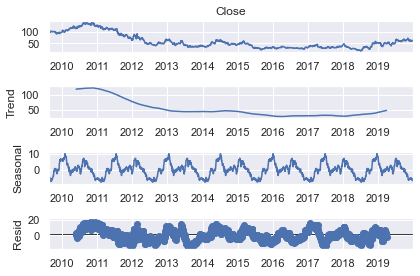

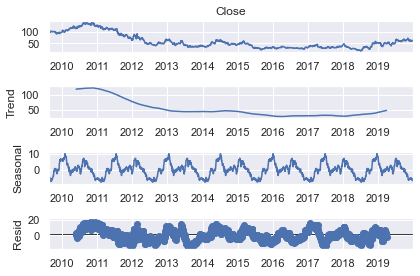

In [20]:
seasonal_decompose(data['Close'],period=365).plot()

In [21]:
from statsmodels.tsa.api import adfuller,kpss
adfuller(data['Close'])

(-1.6593884887971881,
 0.4521487682548928,
 2,
 2542,
 {'1%': -3.4329251045454816,
  '5%': -2.8626776757726495,
  '10%': -2.567375627472622},
 9235.465043473752)

In [22]:
data["Return"]=data["Close"].pct_change(1)*100

In [23]:
adfuller(data['Return'][1:])

(-33.13449702787235,
 0.0,
 1,
 2542,
 {'1%': -3.4329251045454816,
  '5%': -2.8626776757726495,
  '10%': -2.567375627472622},
 12585.901065244583)

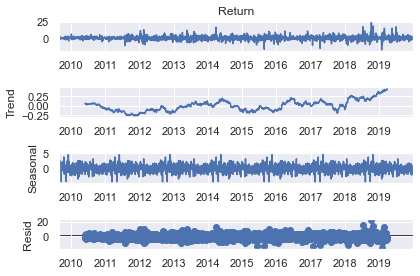

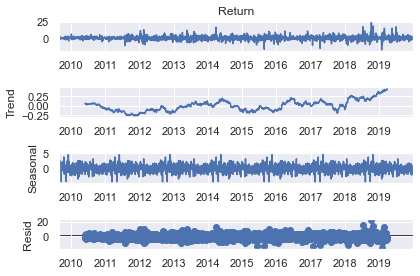

In [25]:
seasonal_decompose(data['Return'][1:],period=365).plot()

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [30]:
p=q=r=range(0,5)
pqr=itertools.product(p,q,r)
for i in pqr:
    model=ARIMA(data['Return'][1:],order=i)
    result=model.fit()
    print('ARIMA {} LLR {}'.format(1,result.aic))

ARIMA 1 LLR 12717.449349499188
ARIMA 1 LLR 12706.34549599635
ARIMA 1 LLR 12704.946205877943
ARIMA 1 LLR 12706.584376885032
ARIMA 1 LLR 12705.229484064886
ARIMA 1 LLR 14279.380610971437
ARIMA 1 LLR 12721.518603594872
ARIMA 1 LLR 12710.50428910316
ARIMA 1 LLR 12709.140917744564
ARIMA 1 LLR 12710.787626113928
ARIMA 1 LLR 17034.90504005745
ARIMA 1 LLR 14284.606600908632
ARIMA 1 LLR 12752.341418500837
ARIMA 1 LLR 12753.993177613454
ARIMA 1 LLR 12753.68347556125


ValueError: d > 2 is not supported

In [31]:
from pmdarima.arima import auto_arima

In [32]:
auto_arima(data['Return'][1:])

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
arimamod=ARIMA(data['Close'],order=(2,0,1))
result=arimamod.fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2545
Model:                     ARMA(2, 1)   Log Likelihood               -4664.890
Method:                       css-mle   S.D. of innovations              1.511
Date:                Thu, 18 Mar 2021   AIC                           9339.779
Time:                        19:07:30   BIC                           9368.989
Sample:                             0   HQIC                          9350.374
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          66.1039     19.651      3.364      0.001      27.588     104.619
ar.L1.Close     1.4072      0.072     19.421      0.000       1.265       1.549
ar.L2.Close    -0.4080      0.072     -5.637      0.000      -0.550      -0.266
ma.L1.Close    -0.3591      0.076     -4.724      0.000      -0.508      -0.210
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
AR.2            2.4478           +0.0000j            2.4478            0.0000
MA.1            2.7846           +0.0000j            2.7846            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
data['Forecast']=result.predict()
data

,Close,Return,Forecast
Date,,,
2009-08-20,100.050003,NaN,66.103895
2009-08-21,103.199997,3.148420,100.011342
2009-08-24,103.050003,-0.145343,103.314133
2009-08-25,102.599998,-0.436686,103.054497
2009-08-26,105.099998,2.436647,102.550839
...,...,...,...
2019-12-24,60.750000,-0.572829,61.073153
2019-12-26,60.049999,-1.152265,60.727476
2019-12-27,60.250000,0.333057,60.012475


<AxesSubplot:xlabel='Date'>

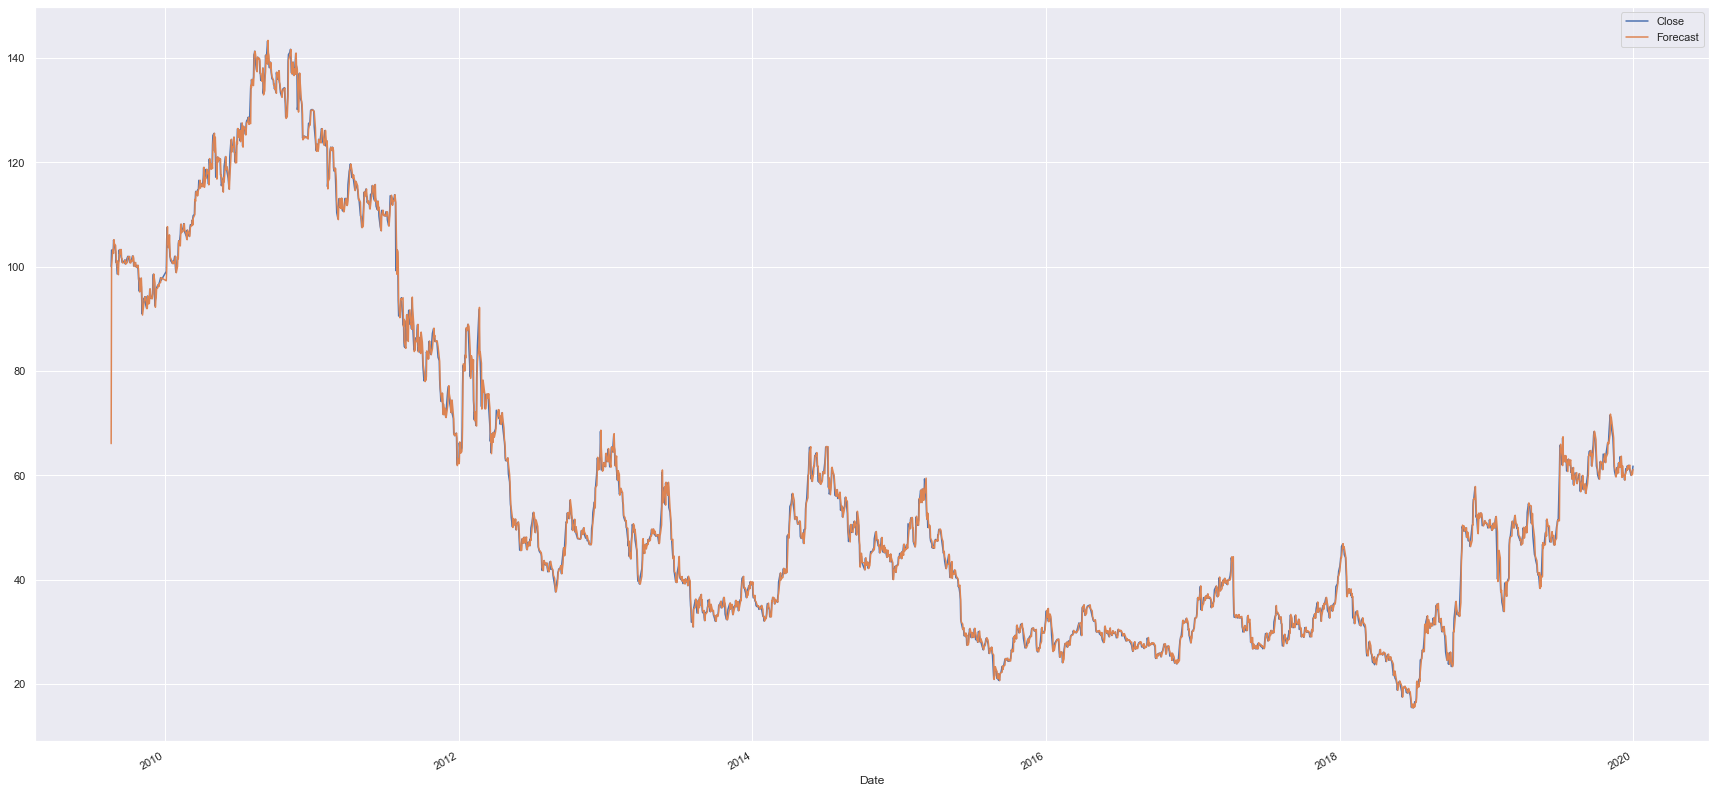

In [39]:
data[['Close','Forecast']].plot(figsize=(30,15))

<AxesSubplot:xlabel='Date'>

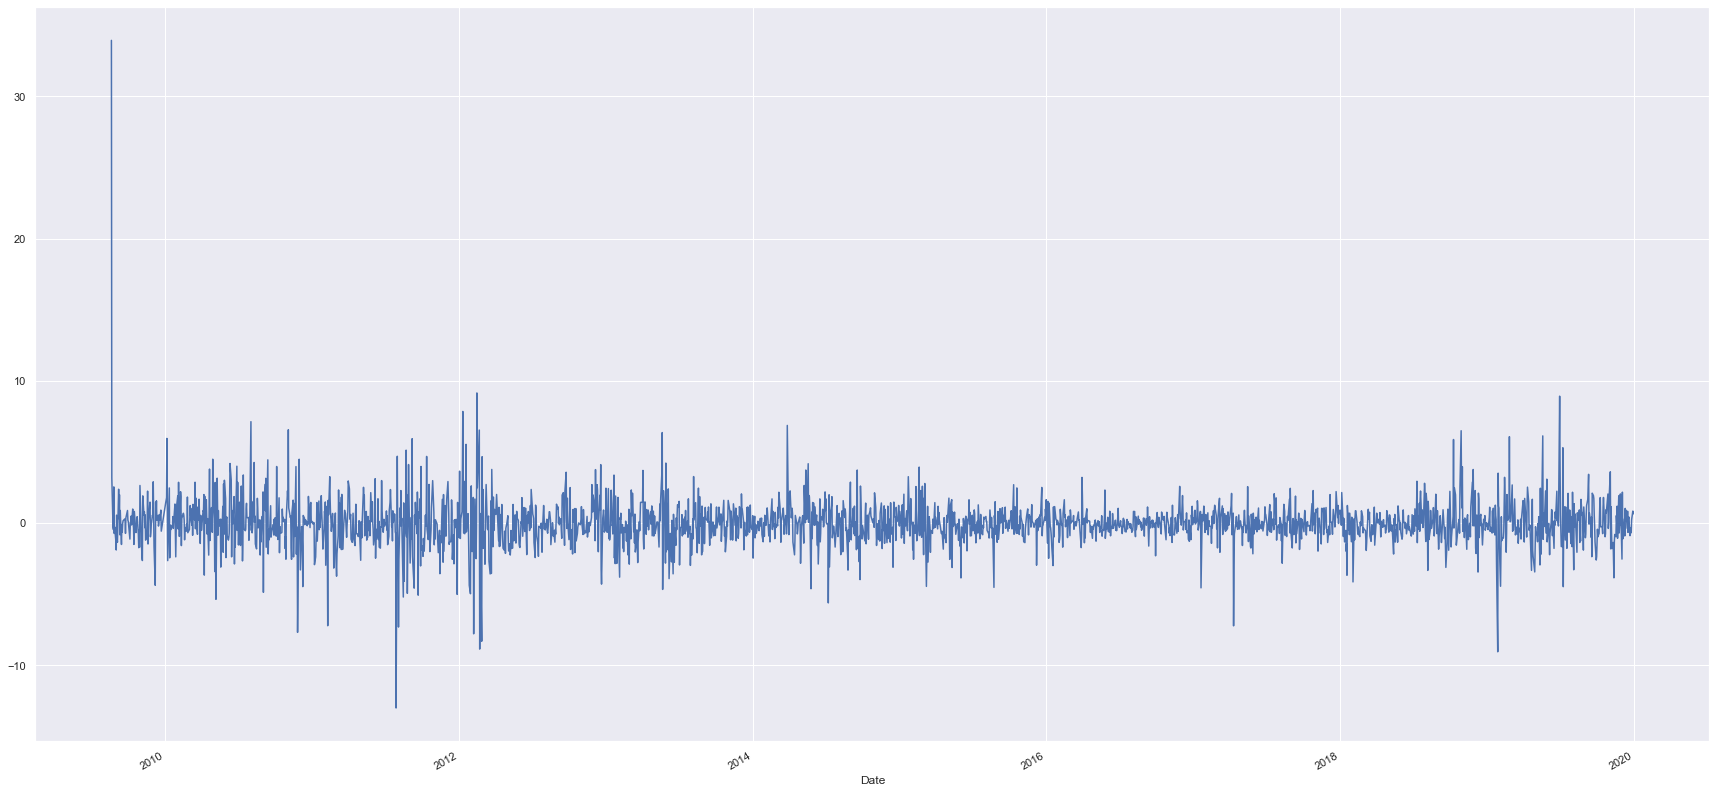

In [40]:
result.resid.plot(figsize=(30,15))

In [41]:
from sklearn.metrics import *

In [44]:
mean_absolute_error(data['Close'],data['Forecast'])

1.030145823897348

In [45]:
np.sqrt(mean_squared_error(data['Close'],data['Forecast']))

1.6538269960864638

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

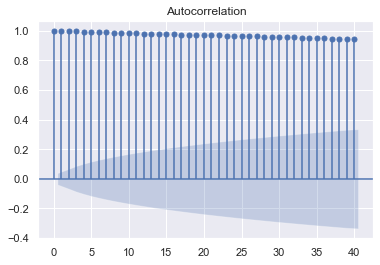

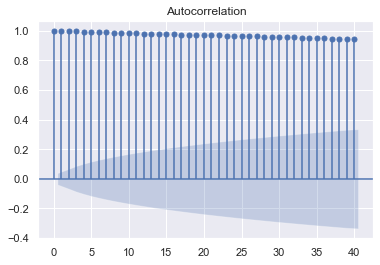

In [47]:
plot_acf(data['Close'],lags=40)

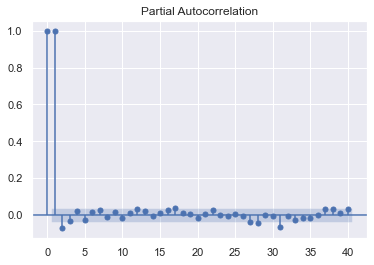

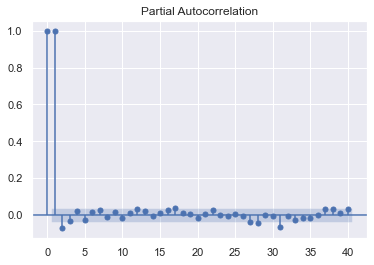

In [48]:
plot_pacf(data['Close'],lags=40)